# <CENTER> BMI 500 - WEEK 11

## <CENTER>  An introduction to model-based machine learning

## QUESTION SET 1

### (i)

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# function for the SIR model
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

### (ii)

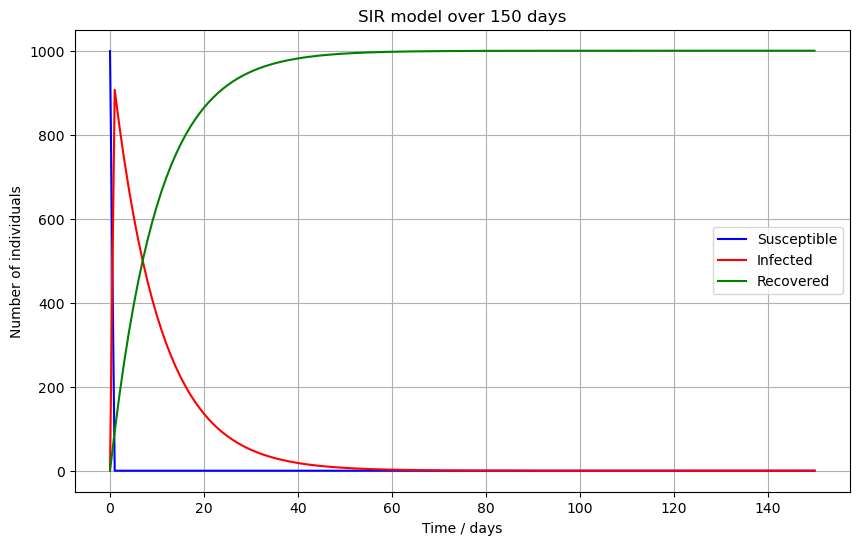

In [2]:
# initial conditions and parameters
S0 = 999
I0 = 1
R0 = 0
beta = 0.3
gamma = 0.1

# time grid for 150 days
t = range(0, 151)

# Initial conditions vector
y0 = [S0, I0, R0]

# Integrate the SIR equations over the time grid, t.
solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T  # transpose the output array and unpack the result

# Plot the data on three separate curves for S(t), I(t), and R(t)
plt.figure(figsize=(10,6))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')
plt.title('SIR model over 150 days')
plt.xlabel('Time / days')
plt.ylabel('Number of individuals')
plt.grid(True)
plt.legend()
plt.show()

### (iii)

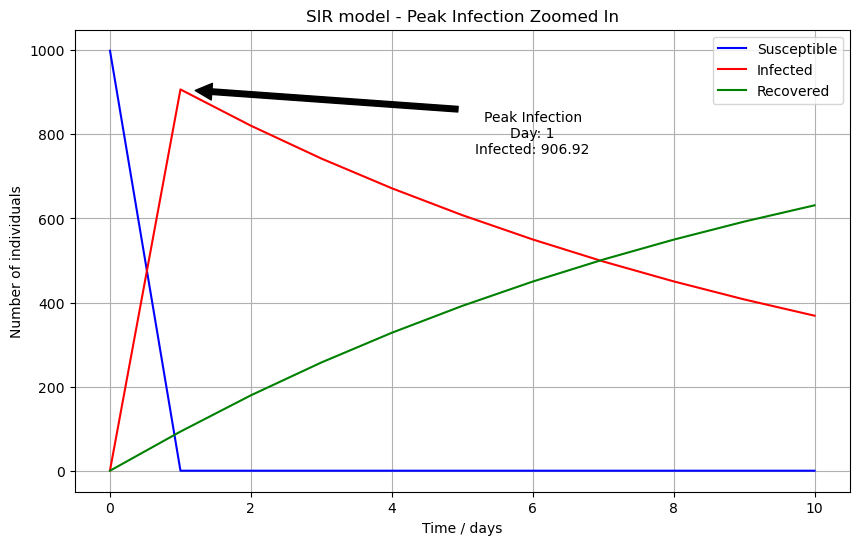

In [3]:
# Find the day of the peak infection
peak_infection_day = np.argmax(I)
peak_infection_value = np.max(I)

# Define a window to zoom in on the peak
window = 10  # days before and after the peak
start_day = max(peak_infection_day - window, 0)
end_day = min(peak_infection_day + window, len(t))

# Plot the zoomed in data
plt.figure(figsize=(10, 6))
plt.plot(t[start_day:end_day], S[start_day:end_day], 'b', label='Susceptible')
plt.plot(t[start_day:end_day], I[start_day:end_day], 'r', label='Infected')
plt.plot(t[start_day:end_day], R[start_day:end_day], 'g', label='Recovered')
plt.title('SIR model - Peak Infection Zoomed In')
plt.xlabel('Time / days')
plt.ylabel('Number of individuals')
plt.grid(True)
plt.legend()

# Annotate the peak in the infected curve
plt.annotate(f'Peak Infection\nDay: {peak_infection_day}\nInfected: {peak_infection_value:.2f}',
             xy=(peak_infection_day, peak_infection_value),
             xytext=(peak_infection_day + 5, peak_infection_value - 50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.show()

## QUESTION SET 2

### (i)

In [4]:
# DSEIR model with birth and death rates
def seir_model(y, t, N, beta, gamma, sigma, mu):
    S, E, I, R = y
    dSdt = mu * N - beta * S * I - mu * S
    dEdt = beta * S * I - (sigma + mu) * E
    dIdt = sigma * E - (gamma + mu) * I
    dRdt = gamma * I - mu * R
    return [dSdt, dEdt, dIdt, dRdt]

### (ii)

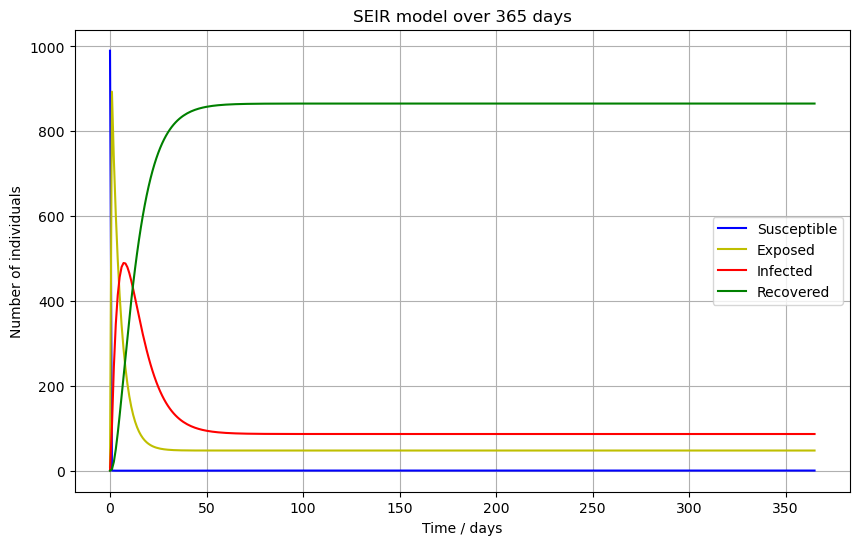

In [5]:
# onditions and parameters for the simulation
S0 = 990
E0 = 9
I0 = 1
R0 = 0
N = S0 + E0 + I0 + R0  # Total population, N.
beta = 0.3   # Transmission rate.
gamma = 0.1  # Recovery rate.
sigma = 0.2  # Rate at which exposed individuals become infectious.
mu = 0.01    # Natural birth and death rate.

# time grid for 365 days
t = range(0, 366)

# conditions vector
y0 = [S0, E0, I0, R0]

# the SEIR equations over the time grid, t.
solution = odeint(seir_model, y0, t, args=(N, beta, gamma, sigma, mu))
S, E, I, R = solution.T  # transpose the output array and unpack the result

# Plot the data on four separate curves for S(t), E(t), I(t), and R(t)
plt.figure(figsize=(10,6))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, E, 'y', label='Exposed')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')
plt.title('SEIR model over 365 days')
plt.xlabel('Time / days')
plt.ylabel('Number of individuals')
plt.grid(True)
plt.legend()
plt.show()